# Importing Relevant Packages

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## Writing a function for creating a NN layer: `createNNLayer(units,W=None,b=None)`

The code will be non-vectorized as the vectorized version has already been covered

In [2]:
def g(z):
    return 1/(1+np.exp(-z))

In [3]:

def createNNLayer(a,units,W=None,b=None):
    # a is a nd array of order m by n
    # m is no. of iterations
    # n is no. of features
    # W has a shape n by units
    # a_out has a shape of m by units 
    # for every reading i the a_out has columns showing the neuron values
    m,n=a.shape
    a_out=np.zeros((m,units))
    if W is None:
        W=np.random.uniform(-1,1,(n,units))
    if b is None:
        b=np.random.uniform(-1,1,(units,1))
    for i in range(m):
        for j in range(units):
            a_out[i][j]=g(np.dot(W[:,j],a[i,:])+b[j,0])
    return a_out

In [4]:
a1=np.array([1,2,5,7,10])
a2=createNNLayer(a1.reshape(-1,1),10)

In [5]:
a2

array([[5.18022662e-01, 3.33505991e-01, 5.55453873e-01, 2.67308579e-01,
        4.18954375e-01, 2.14601098e-01, 6.44058391e-01, 4.40324853e-01,
        7.44134643e-01, 2.74967736e-01],
       [5.56281941e-01, 3.97959800e-01, 5.38059975e-01, 1.53053275e-01,
        3.91632046e-01, 1.12749262e-01, 8.28658088e-01, 3.57707000e-01,
        8.44750383e-01, 2.37746309e-01],
       [6.65516951e-01, 6.03774683e-01, 4.85490232e-01, 2.14899815e-02,
        3.14184811e-01, 1.26219905e-02, 9.89286912e-01, 1.64958131e-01,
        9.72703366e-01, 1.47843760e-01],
       [7.30252871e-01, 7.26713624e-01, 4.50549947e-01, 5.35952596e-03,
        2.67487694e-01, 2.75737990e-03, 9.98486425e-01, 9.00714050e-02,
        9.92046740e-01, 1.05021033e-01],
       [8.11195641e-01, 8.59748604e-01, 3.99142509e-01, 6.54425442e-04,
        2.06266909e-01, 2.78068668e-04, 9.99920616e-01, 3.39206109e-02,
        9.98777333e-01, 6.12734166e-02]])

## Interpretaion of output: 
1- The output has 5 rows which shows the number of data points i.e total number of readings.

2- The output has 10 columns that show the outpput corresponding to each artificial neuron in the network.

## Lets make a more fancy function for layer

In [6]:
def NNLayer(units,activation):
    # a is a nd array of order m by n
    # m is no. of iterations
    # n is no. of features
    # W has a shape n by units
    # a_out has a shape of m by units 
    # for every reading i the a_out has columns showing the neuron values
    # activation is the type of activation function we want to use e.g. sigmoid, ReLU, linear
    
    def get_a_out(a,W_init=None,b_init=None):
        m,n=a.shape
        a_out=np.zeros((m,units))
        if W_init is None:
            W=np.random.uniform(-1,1,(n,units))
        else:
            W=W_init
        if b_init is None:
            b=np.random.uniform(-1,1,(units,1))
        else: 
            b=b_init
        for i in range(m):
            for j in range(units):
                a_out[i][j]=g(np.dot(W[:,j],a[i,:])+b[j,0])
        return a_out
    return get_a_out

In [7]:
myLayer=NNLayer(units=10,activation='sigmoid')

In [8]:
myLayer(a1.reshape(-1,1))

array([[6.33407673e-01, 4.60326685e-01, 2.04646311e-01, 7.90248964e-01,
        3.05990764e-01, 7.76233708e-01, 2.12958429e-01, 6.83523515e-01,
        7.89558666e-01, 2.13380036e-01],
       [7.68001236e-01, 4.58990079e-01, 8.71247452e-02, 8.75836410e-01,
        1.92684677e-01, 8.63562739e-01, 1.44024593e-01, 8.12351813e-01,
        8.95445500e-01, 1.36668616e-01],
       [9.58815854e-01, 4.54983878e-01, 4.84707019e-03, 9.78856182e-01,
        3.64794040e-02, 9.74648827e-01, 3.88852794e-02, 9.72116004e-01,
        9.90278535e-01, 3.05031720e-02],
       [9.88433822e-01, 4.52316278e-01, 6.69686394e-04, 9.93875668e-01,
        1.09727834e-02, 9.92247465e-01, 1.54036846e-02, 9.92911215e-01,
        9.98119511e-01, 1.06016796e-02],
       [9.98338917e-01, 4.48320057e-01, 3.41984922e-05, 9.99061979e-01,
        1.75682161e-03, 9.98715375e-01, 3.74774774e-03, 9.99114246e-01,
        9.99841624e-01, 2.12513700e-03]])

## Lets do some work with Tensorflow

### Lets examine the Coffee data using Tensorflow

## <p style='color:red;'>Importing the Coffee Data</p>

In [9]:
import pickle
with open('Coffee Roasting_BinaryOut','rb') as file:
    y_train=pickle.load(file)
with open('Coffee Roasting_inputData(Temp and Duration)','rb') as file:
    x_train=pickle.load(file)

In [10]:
x_train.shape,y_train.shape

((200, 2), (200, 1))

### Normalize the Data using Numpy only

In [11]:
cols=x_train.shape[1]
x_scaled=np.zeros(x_train.shape)
for j in range(cols):
    x_scaled[:,j]=(x_train[:,j]-np.mean(x_train[:,j]))/(np.max(x_train[:,j])-np.min(x_train[:,j]))

In [12]:
model=tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(units=3,activation='relu'),
    #tf.keras.layers.Dense(units=3,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid'),
])
losses=tf.keras.losses.BinaryCrossentropy()
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)

In [13]:
model.compile(loss=losses,optimizer=optimizer,metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100,verbose=2)

Epoch 1/100
7/7 - 0s - loss: 93.1554 - accuracy: 0.2150
Epoch 2/100
7/7 - 0s - loss: 74.9152 - accuracy: 0.2150
Epoch 3/100
7/7 - 0s - loss: 59.3833 - accuracy: 0.2150
Epoch 4/100
7/7 - 0s - loss: 45.4064 - accuracy: 0.2150
Epoch 5/100
7/7 - 0s - loss: 33.7151 - accuracy: 0.2150
Epoch 6/100
7/7 - 0s - loss: 23.9009 - accuracy: 0.2150
Epoch 7/100
7/7 - 0s - loss: 15.9367 - accuracy: 0.2150
Epoch 8/100
7/7 - 0s - loss: 9.2152 - accuracy: 0.2150
Epoch 9/100
7/7 - 0s - loss: 3.7119 - accuracy: 0.2150
Epoch 10/100
7/7 - 0s - loss: 0.6497 - accuracy: 0.6650
Epoch 11/100
7/7 - 0s - loss: 0.5548 - accuracy: 0.7850
Epoch 12/100
7/7 - 0s - loss: 0.5513 - accuracy: 0.7850
Epoch 13/100
7/7 - 0s - loss: 0.5489 - accuracy: 0.7850
Epoch 14/100
7/7 - 0s - loss: 0.5473 - accuracy: 0.7850
Epoch 15/100
7/7 - 0s - loss: 0.5460 - accuracy: 0.7850
Epoch 16/100
7/7 - 0s - loss: 0.5446 - accuracy: 0.7850
Epoch 17/100
7/7 - 0s - loss: 0.5433 - accuracy: 0.7850
Epoch 18/100
7/7 - 0s - loss: 0.5423 - accuracy: 0

In [14]:
[layer_1,layer_2]=model.layers
print("Layer1 weights: ",layer_1.get_weights() )
print("Layer2 weights: ",layer_2.get_weights() )

Layer1 weights:  [array([[-0.05135967, -0.88888854, -0.75683737],
       [-0.25557193, -0.15858752, -1.0260637 ]], dtype=float32), array([-0.63664633,  0.        ,  0.        ], dtype=float32)]
Layer2 weights:  [array([[ 0.45062777],
       [-0.8730043 ],
       [-0.5730693 ]], dtype=float32), array([-1.2741557], dtype=float32)]


In [15]:
x_test=np.array([[200,17]])  # positive sample,negative sample
model.predict(x_test) ## this predicts only a single reading

array([[0.21854669]], dtype=float32)

In [16]:
predictions=model.predict_on_batch(x_scaled)
predictions.shape

(200, 1)

In [17]:
labels=y_train
labels.shape

(200, 1)

In [18]:
cm=tf.math.confusion_matrix(labels.reshape(200,),predictions.reshape(200,))
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[157,   0],
       [ 43,   0]])>

In [19]:
import seaborn as sns

<Axes: >

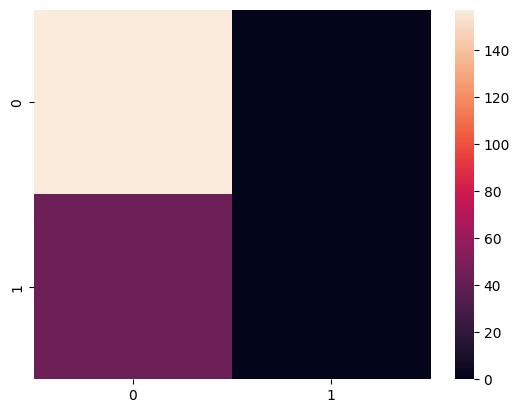

In [20]:
sns.heatmap(cm)

In [21]:
accuracy=(cm[0,0]+cm[1,1])/np.sum(cm)*100

In [22]:
accuracy

<tf.Tensor: shape=(), dtype=float64, numpy=78.5>